In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fake-news-detection/True.csv
/kaggle/input/fake-news-detection/Fake.csv


# Index
* Importing Libraries
* Reading csv file
* Inserting the status column
*  merging the columns
*  Cleaning data
*  Train test split
* Applying LogisticRegression
* Accuracy score : 98%

# Importing Libraries

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

# Reading csv file

In [3]:
df0 = pd.read_csv("../input/fake-news-detection/Fake.csv")
df1 = pd.read_csv("../input/fake-news-detection/True.csv")

In [4]:
df0.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
df1.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


# Inserting the status column

In [6]:
df0["status"] = 0
df1["status"] = 1

In [7]:
df0.shape

(23481, 5)

In [8]:
df1.shape

(21417, 5)

# merging the columns

In [9]:
df_merge = pd.concat([df0, df1], axis =0 )
df_merge.head(10)

,title,text,subject,date,status
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [10]:
df_merge.columns

Index(['title', 'text', 'subject', 'date', 'status'], dtype='object')

# Cleaning data

In [11]:
df = df_merge.drop(["title", "subject","date"], axis = 1)

In [12]:
df.isnull().sum()

text      0
status    0
dtype: int64

In [13]:
df = df.sample(frac = 1)

In [14]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [15]:
df.columns

Index(['text', 'status'], dtype='object')

In [16]:
df.head()

,text,status
0,(Reuters) - Maryland’s House of Delegates on M...,1
1,MOSCOW (Reuters) - Russian Deputy Foreign Mini...,1
2,40% of Americans have given up looking for wor...,0
3,Whether Republican nominee Donald Trump actual...,0
4,Republicans are repulsive people. This is a kn...,0


In [17]:
def wp(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [18]:
df["text"] = df["text"].apply(wp)

In [19]:
x = df["text"]
y = df["status"]

# Train test split

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,random_state=42)

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

# Applying LogisticRegression

In [22]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(xv_train,y_train)

LogisticRegression()

In [23]:
pred_lr=lr.predict(xv_test)

In [24]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      5917
           1       0.98      0.99      0.98      5308

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



# Accuracy score : 98%

In [25]:
accuracy_score(y_test, pred_lr)

0.9857461024498887

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='status'>

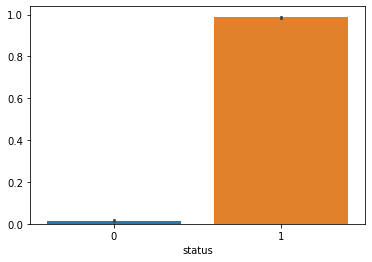

In [26]:
sns.barplot(y_test, pred_lr)